In [1]:
import pandas as pd

# Read Data

data describtion - https://www.kaggle.com/competitions/titanic/data

In [2]:
train_df = pd.read_csv(r"C:\Users\hojk8\OneDrive\Desktop\project\Titanic\Data\Raw Data\train (version 1).csv")

In [3]:
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###### Assumption and Suggestion
Categorical Data:
- nominal, ratio, interval - Sex, SibSp, Parch, Cabin, Embarked
- ordinal - Pclass

Numerical Data:
- Age, Fare

Target Variable: 
- Survived

Unique Column:
- PassengerId, Name, Ticket

# Data Analyst and Data Cleaning

In [4]:
# Raw file (no. of rows, no. of columns)
train_df.shape

(891, 12)

### Check missing values / no. of null
### &
### Description

In [5]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

###### Assumption and Suggestion

- Cabin - since data have only 891 rows and 687 is greater than half of it, since this feature can be dropped

- Embarked - since only 2 Embarked was blank, after look thru the data, found that 2 of them have the similarities of 

(General) PClass=1, Survived=1, Sex=female

(Specific) Sibsp=0, Parch=0, Ticket=113572, Fare=80, Cabin=B28

only their age are 38 and 62 apart.

When reached all of the conditions, we found that Embarked have both C and S.

- Age - average the age according PClass and Survived

In [6]:
# Since 'Cabin' too many blanks column, Drop the 'Cabin' column
train_2 = train_df.drop(columns=['Cabin'])

In [7]:
train_2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


###### Assumption and Suggestion
Cabin has been dropped

In [8]:
# Filter the DataFrame where 'Embarked' is 'C'
df_c = train_2[train_2['Embarked'] == 'C']

# Get the description of the 'Age' column for this filtered DataFrame
description_age_c = df_c['Age'].describe()
description_age_c

count    130.000000
mean      30.814769
std       15.434860
min        0.420000
25%       21.250000
50%       29.000000
75%       40.000000
max       71.000000
Name: Age, dtype: float64

In [9]:
# Filter the DataFrame where 'Embarked' is 'S'
df_s = train_2[train_2['Embarked'] == 'S']

# Get the description of the 'Age' column for this filtered DataFrame
description_age_s = df_s['Age'].describe()
description_age_s

count    554.000000
mean      29.445397
std       14.143192
min        0.670000
25%       21.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

###### Assumption and Suggestion
mean abit too close and their min and max can cover up 38 and 62

no conclusion can be made here

In [10]:
# Filter the DataFrame where 'Embarked' = C, 'PClass' = 1, 'Survived' = 1, 'Sex' = female
filtered_df_c = train_2[(train_2['Embarked'] == 'C') 
                        & (train_2['Pclass'] == 1)                   
                        & (train_2['Survived'] == 1)         
                        & (train_2['Sex'] == 'female')
                       ]


# Get the description of the 'Age' column for this filtered DataFrame
description_age_filtered_c = filtered_df_c['Age'].describe()
description_age_filtered_c

count    37.000000
mean     35.675676
std      13.032127
min      16.000000
25%      24.000000
50%      36.000000
75%      44.000000
max      60.000000
Name: Age, dtype: float64

In [11]:
# Filter the DataFrame where 'Embarked' = S, 'PClass' = 1, 'Survived' = 1, 'Sex' = female
filtered_df_s = train_2[(train_2['Embarked'] == 'S') 
                        & (train_2['Pclass'] == 1)   
                        & (train_2['Survived'] == 1)         
                        & (train_2['Sex'] == 'female')
                       ]


# Get the description of the 'Age' column for this filtered DataFrame
description_age_filtered_s = filtered_df_s['Age'].describe()
description_age_filtered_s

count    42.000000
mean     33.619048
std      13.260895
min      14.000000
25%      22.000000
50%      34.000000
75%      42.250000
max      63.000000
Name: Age, dtype: float64

###### Assumption and Suggestion
Since Embarked=S and cover up to 63, the empty Embarked with age 62 will be filled with S and the other will be C

In [12]:
# Fill empty values in 'Embarked' column with 'S' when 'Age' is 62
train_2.loc[(train_2['Age'] == 62) & (train_2['Embarked'].isna()), 'Embarked'] = 'S'

In [13]:
# Fill empty values in 'Embarked' column with 'C' when 'Age' is 38 (the only one empty Embarked)
train_2['Embarked'].fillna('C', inplace=True)

In [14]:
train_2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

###### Assumption and Suggestion
There is no empty Embarked

In [15]:
train_2.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
# Group by Pclass, Survived and Sex, then calculate the average age
average_age = train_2.groupby(['Pclass', 'Survived', 'Sex'])['Age'].mean().reset_index().round(2)
average_age

,Pclass,Survived,Sex,Age
0,1,0,female,25.67
1,1,0,male,44.58
2,1,1,female,34.94
3,1,1,male,36.25
4,2,0,female,36.00
5,2,0,male,33.37
6,2,1,female,28.08
7,2,1,male,16.02
8,3,0,female,23.82
9,3,0,male,27.26


In [17]:
# Fill empty values follow the table above
train_2.loc[(train_2['Pclass'] == 1) 
            & (train_2['Survived'] == 0)  
            & (train_2['Sex'] == 'female') 
            & (train_2['Age'].isna()), 'Age'
           ] = 25.67
train_2.loc[(train_2['Pclass'] == 1) 
            & (train_2['Survived'] == 0)  
            & (train_2['Sex'] == 'male') 
            & (train_2['Age'].isna()), 'Age'
           ] = 44.58

train_2.loc[(train_2['Pclass'] == 1) 
            & (train_2['Survived'] == 1)  
            & (train_2['Sex'] == 'female') 
            & (train_2['Age'].isna()), 'Age'
           ] = 34.94
train_2.loc[(train_2['Pclass'] == 1) 
            & (train_2['Survived'] == 1)  
            & (train_2['Sex'] == 'male') 
            & (train_2['Age'].isna()), 'Age'
           ] = 36.25

train_2.loc[(train_2['Pclass'] == 2) 
            & (train_2['Survived'] == 0)  
            & (train_2['Sex'] == 'female') 
            & (train_2['Age'].isna()), 'Age'
           ] = 36.00
train_2.loc[(train_2['Pclass'] == 2) 
            & (train_2['Survived'] == 0)  
            & (train_2['Sex'] == 'male') 
            & (train_2['Age'].isna()), 'Age'
           ] = 33.37

train_2.loc[(train_2['Pclass'] == 2) 
            & (train_2['Survived'] == 1)  
            & (train_2['Sex'] == 'female') 
            & (train_2['Age'].isna()), 'Age'
           ] = 28.08
train_2.loc[(train_2['Pclass'] == 2) 
            & (train_2['Survived'] == 1)  
            & (train_2['Sex'] == 'male') 
            & (train_2['Age'].isna()), 'Age'
           ] = 16.02

train_2.loc[(train_2['Pclass'] == 3) 
            & (train_2['Survived'] == 0)  
            & (train_2['Sex'] == 'female') 
            & (train_2['Age'].isna()), 'Age'
           ] = 28.82
train_2.loc[(train_2['Pclass'] == 3) 
            & (train_2['Survived'] == 0)  
            & (train_2['Sex'] == 'male') 
            & (train_2['Age'].isna()), 'Age'
           ] = 27.26

train_2.loc[(train_2['Pclass'] == 3) 
            & (train_2['Survived'] == 1)  
            & (train_2['Sex'] == 'female') 
            & (train_2['Age'].isna()), 'Age'
           ] = 19.33
train_2.loc[(train_2['Pclass'] == 3) 
            & (train_2['Survived'] == 1)  
            & (train_2['Sex'] == 'male') 
            & (train_2['Age'].isna()), 'Age'
           ] = 22.27

In [18]:
train_2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

###### Assumption and Suggestion
There is no empty Age

### Check number of zeros

In [19]:
# Count number of zeros in all columns of Dataframe

for column_name in train_2.columns:
    column = train_df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column', column_name, 'is: ', count)

Count of zeros in column PassengerId is:  0
Count of zeros in column Survived is:  549
Count of zeros in column Pclass is:  0
Count of zeros in column Name is:  0
Count of zeros in column Sex is:  0
Count of zeros in column Age is:  0
Count of zeros in column SibSp is:  608
Count of zeros in column Parch is:  678
Count of zeros in column Ticket is:  0
Count of zeros in column Fare is:  15
Count of zeros in column Embarked is:  0


###### Assumption and Sugeestion
Survived - 0 means not survived here, its okay to be zero

SibSp - number of sibling and spouse, its okay to be zero

Parch - number of parent and children, its okay to be zero

Fare - it might be a discount voucher, its okay to be zero

### Unique number

In [20]:
train_2.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             98
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
dtype: int64

###### Assumption and Suggestion
Unique categorical data and shld be remove from training model - PassengerId, Name

Categorical data with too many dimensions (check any other way to gather them or drop from training model) - Ticket

Numerical data its okay to have many dimension, feature binning or feature scaling will handle it anyways

In [21]:
# Drop the 'PassengerId', 'Name' column
train_2.drop(columns=['PassengerId', 'Name'], inplace=True)

In [22]:
train_2

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.00,1,0,A/5 21171,7.2500,S
1,1,1,female,38.00,1,0,PC 17599,71.2833,C
2,1,3,female,26.00,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.00,1,0,113803,53.1000,S
4,0,3,male,35.00,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.00,0,0,211536,13.0000,S
887,1,1,female,19.00,0,0,112053,30.0000,S
888,0,3,female,28.82,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.00,0,0,111369,30.0000,C


###### Assumption and Suggestion
Data Remaining
Categorical Data:
- nominal, ratio, interval - Sex, SibSp, Parch, Embarked
- ordinal - Pclass

Numerical Data:
- Age, Fare

Target Column: 
- Survived

Unique Column:
- Ticket

In [23]:
train_2.nunique()

Survived      2
Pclass        3
Sex           2
Age          98
SibSp         7
Parch         7
Ticket      681
Fare        248
Embarked      3
dtype: int64

In [24]:
train_2.shape

(891, 9)

###### Assumption and Sugeestion
since there Ticket is half more than the row of data, can consider as unique data
- drop it

In [25]:
# Drop the 'Ticket' column from the DataFrame
train_3 = train_2.drop(columns=['Ticket'])

In [26]:
train_3

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.00,1,0,7.2500,S
1,1,1,female,38.00,1,0,71.2833,C
2,1,3,female,26.00,0,0,7.9250,S
3,1,1,female,35.00,1,0,53.1000,S
4,0,3,male,35.00,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.00,0,0,13.0000,S
887,1,1,female,19.00,0,0,30.0000,S
888,0,3,female,28.82,1,2,23.4500,S
889,1,1,male,26.00,0,0,30.0000,C


In [27]:
# save train_3 in excel to fully see in the future
#train_3.to_csv(r"C:\Users\hojk8\OneDrive\Desktop\project\Titanic\Data\train_3.csv", index=False)

###### Assumption and Suggestion
Data Remaining
Categorical Data:
- nominal, ratio, interval - Sex, Sibsp, Parch, Embarked
- ordinal - Pclass

Numerical Data:
- Age, Fare

Target Column: 
- Survived

### Categorical Analysis

###### target variable = Survived

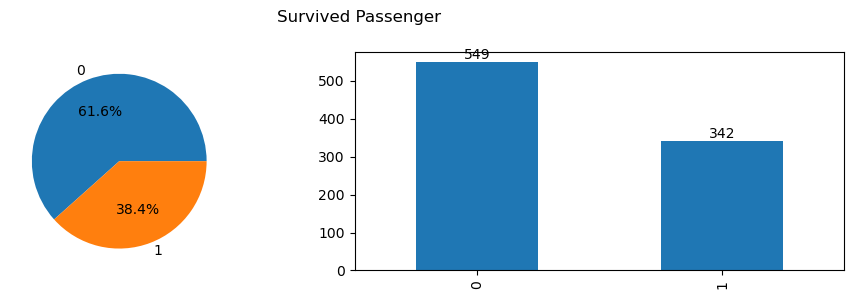

In [28]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 3))


# Add title to the chart
fig.suptitle('Survived Passenger')

# Pie chart
ax1 = fig.add_subplot(1, 2, 1)
pieChart = train_3['Survived'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%', ax=ax1)
ax1.set_ylabel('')  # Remove the y-label

# Bar chart
ax2 = fig.add_subplot(1, 2, 2)
barChart = train_3['Survived'].value_counts().plot(kind='bar', ax=ax2)

# Annotate the bar chart with counts
for p in barChart.patches:
    barChart.annotate(f'{int(p.get_height())}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

###### Assumption and Suggestion
Target consider balance, as long as it is not 1:9

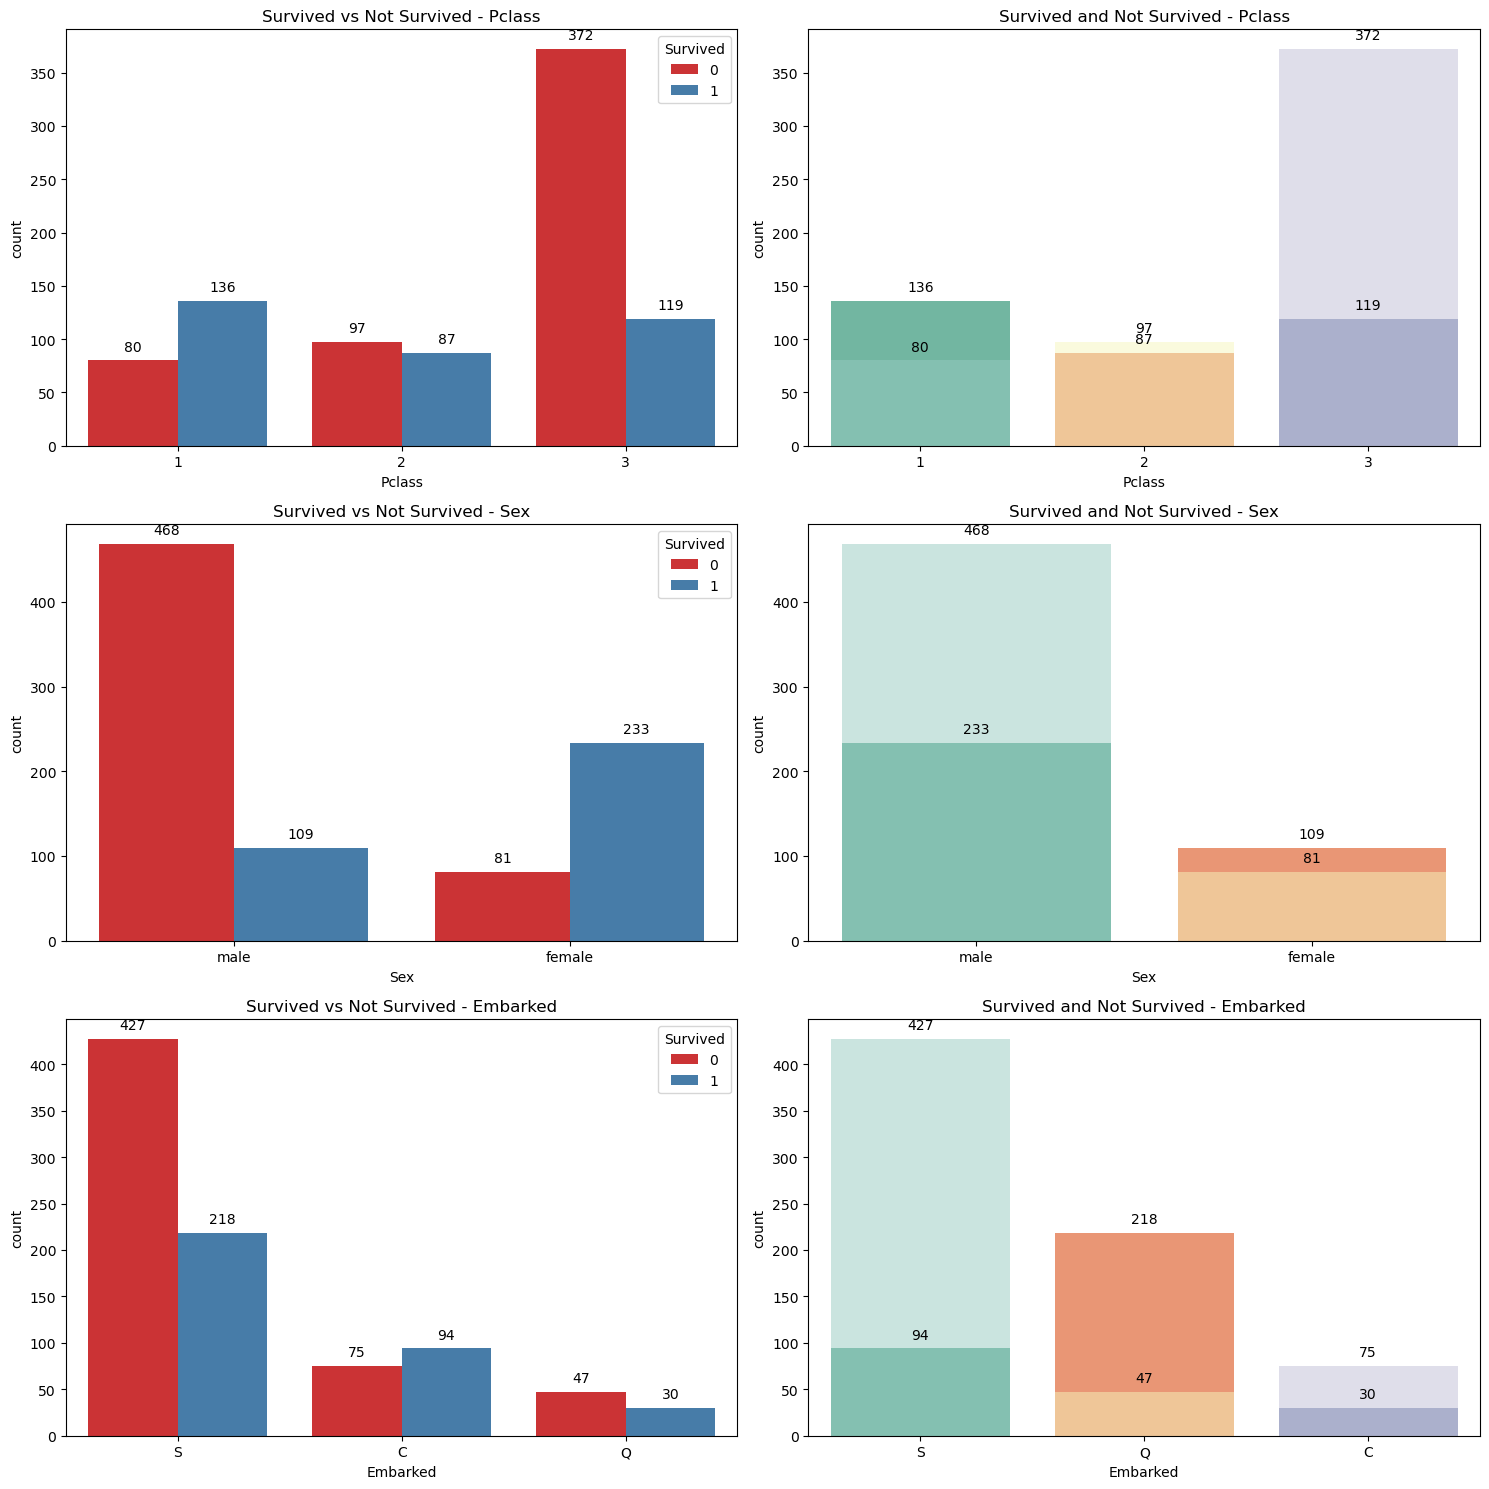

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_vars = ['Pclass', 'Sex', 'Embarked']
numerical_vars = ['Age', 'Fare', 'SibSp', 'Parch']

# Categorical Variables
fig, axs = plt.subplots(len(categorical_vars), 2, figsize=(15, len(categorical_vars) * 5))

for i, var in enumerate(categorical_vars):
    ax = sns.countplot(x=var, hue='Survived', data=train_3, ax=axs[i, 0], palette="Set1")
    axs[i, 0].set_title(f'Survived vs Not Survived - {var}')
    
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    sns.countplot(x=var, data=train_3[train_3['Survived'] == 1], ax=axs[i, 1], palette="Set2")
    sns.countplot(x=var, data=train_3[train_3['Survived'] == 0], ax=axs[i, 1], palette="Set3", alpha=0.5)
    axs[i, 1].set_title(f'Survived and Not Survived - {var}')
    
    for p in axs[i, 1].patches:
        axs[i, 1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

### Numerical Analysis

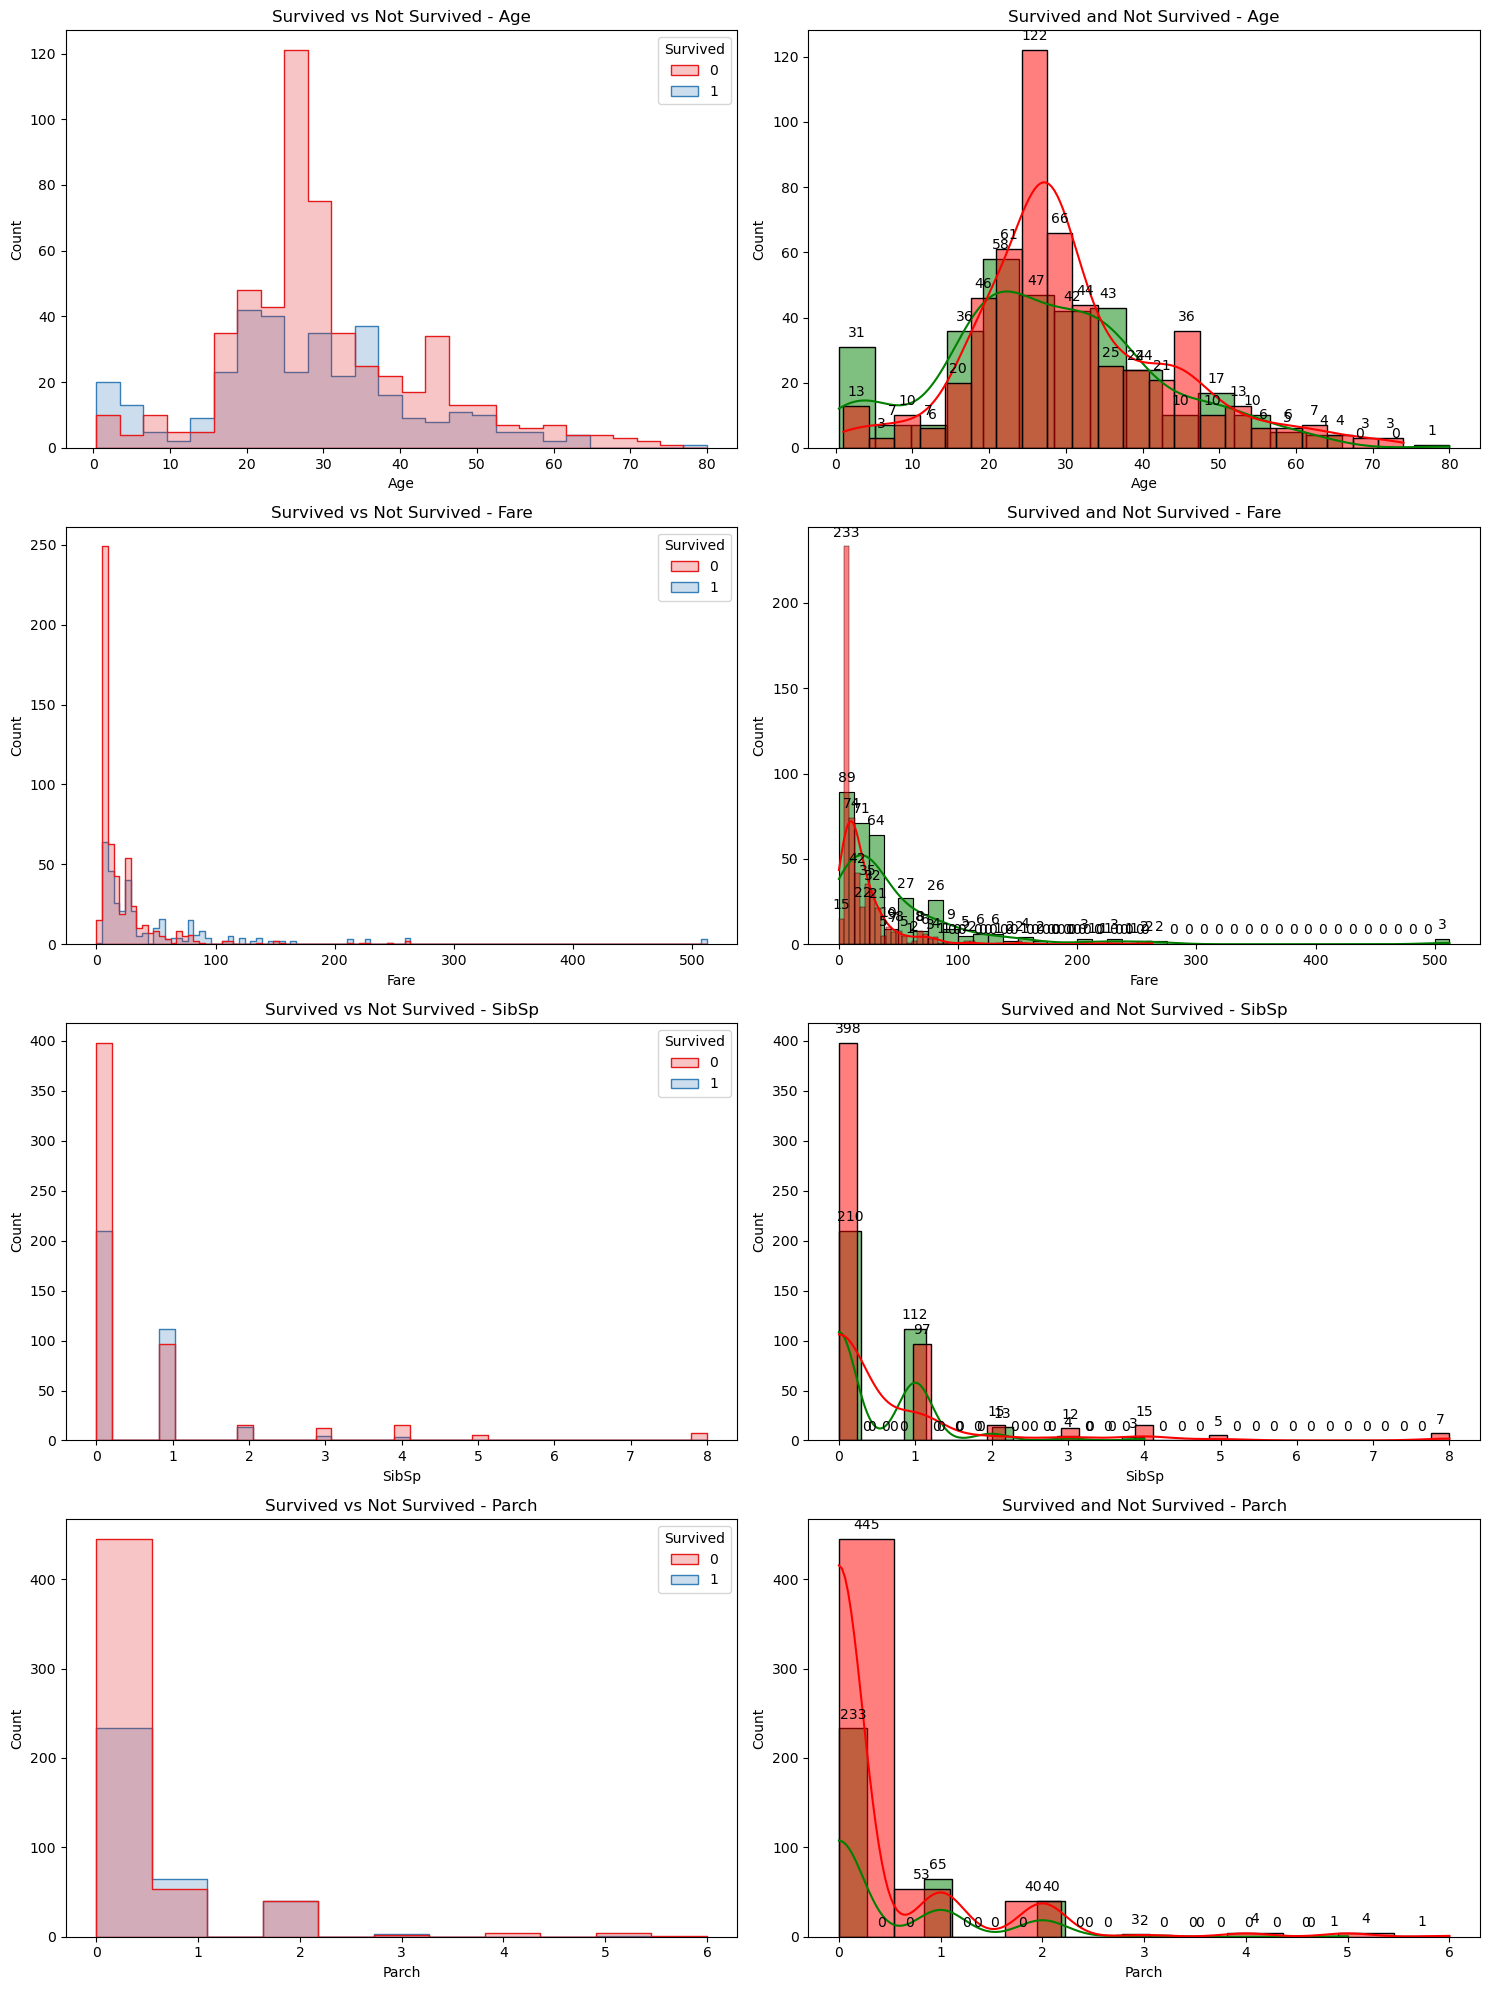

In [30]:
# Numerical Variables
fig, axs = plt.subplots(len(numerical_vars), 2, figsize=(15, len(numerical_vars) * 5))

for i, var in enumerate(numerical_vars):
    ax = sns.histplot(data=train_3, x=var, hue='Survived', element='step', ax=axs[i, 0], palette="Set1", common_norm=False)
    axs[i, 0].set_title(f'Survived vs Not Survived - {var}')

    sns.histplot(data=train_3[train_3['Survived'] == 1], x=var, ax=axs[i, 1], color='g', kde=True)
    sns.histplot(data=train_3[train_3['Survived'] == 0], x=var, ax=axs[i, 1], color='r', kde=True)
    axs[i, 1].set_title(f'Survived and Not Survived - {var}')
    
    # Annotate histograms with counts
    for p in axs[i, 1].patches:
        height = p.get_height()
        axs[i, 1].annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                           ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

###### Assumption and Sugestion
Pclass - the higher class, the higher change of survived

Sex - most female survived, as well-known men let women go first


- check correlation:

Embarked - Embarked C has the highest chance of survived. isit bacuz most of them are from Pclass 1 and female?

Age - around 25-28 most of them unsurvived

Fare - the lowest fare, the lowest change they alive

Sibsp - the lowest change of survived is zero Sibling or Spouse, but with 1 Sibsp has the highest change to survived

Parch - same as Sibsp






### Number of outlier

In [31]:
# Function to identify outliers using IQR and return both the count and the outliers
def count_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers.shape[0], outliers, Q1, Q3, lower_bound, upper_bound

In [32]:
# Plotting the box plot to visualize outliers
def plot_outliers(data, column):
    fig, ax = plt.subplots(figsize=(8,6))
    ax.boxplot(data[column].dropna(), vert=False)
    ax.set_title(f'Box plot of {column} with outliers')
    ax.set_xlabel(column)
    
    outliers_count, outliers, Q1, Q3, lower_bound, upper_bound = count_outliers(data, column)
    print(f'Number of outliers in {column}: {outliers_count}')
    print(f'Q1: {Q1}, Q3: {Q3}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')
    
    # Highlight outliers
    for outlier in outliers[column]:
        ax.scatter(outlier, 1, color='red')
    
    plt.show()

Number of outliers in Age: 28
Q1: 21.0, Q3: 36.0, Lower Bound: -1.5, Upper Bound: 58.5


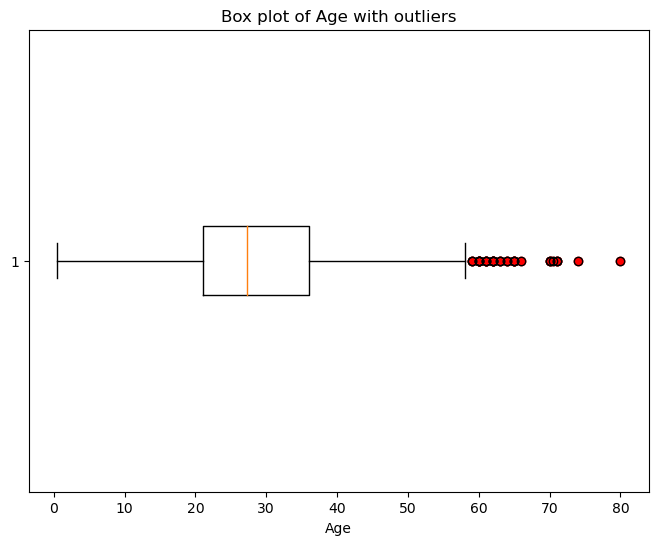

In [33]:
# Example usage for the 'Age' column
plot_outliers(train_3, 'Age')

###### Assumption and Suggestion
there are outliers after 58.5, but there is no nonsense values. No action needed

Number of outliers in Fare: 116
Q1: 7.9104, Q3: 31.0, Lower Bound: -26.724, Upper Bound: 65.6344


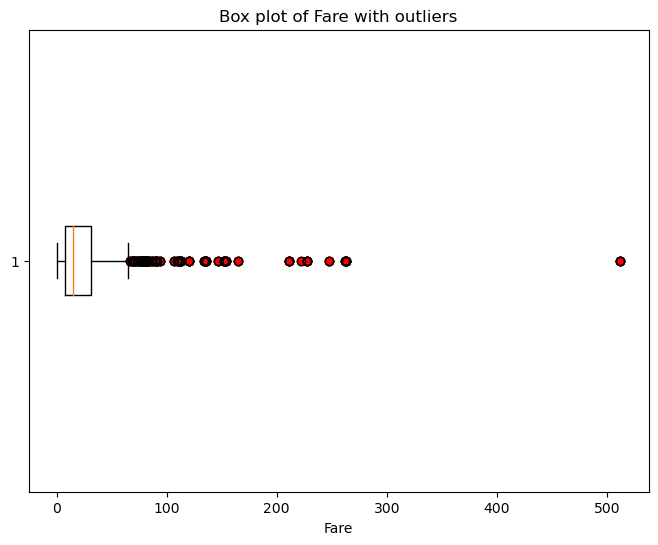

In [34]:
plot_outliers(train_3, 'Fare')

###### Assumption and Suggestion
there are outliers after 65.6, but there is no nonsense values. No action needed

In [35]:
# plot_outliers(train_3, 'Sibsp')

In [36]:
# plot_outliers(train_3, 'Parch')

### Correlation

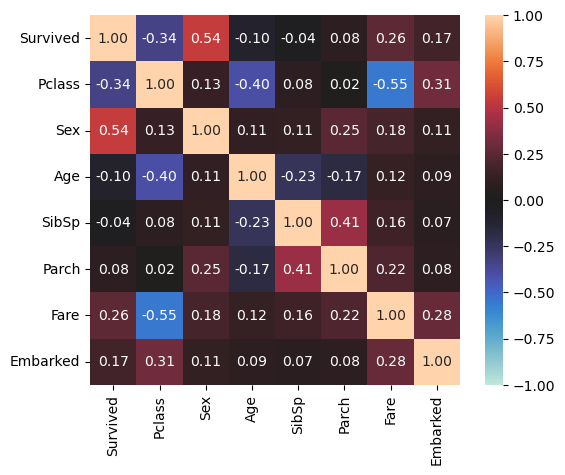

In [37]:
from dython.nominal import associations
correlation_1 = associations(train_3, filename= 'correlation_1.png')
# correlation_1 = associations(train_3, filename= 'correlation_1.png', figsize=(5,5))

From https://www.andrews.edu/~calkins/math/edrm611/edrm05.htm#:~:text=Correlation%20coefficients%20whose%20magnitude%20are,can%20be%20considered%20highly%20correlated.
Correlation coefficients whose magnitude are between 0.9 and 1.0 indicate variables which can be considered very highly correlated. Correlation coefficients whose magnitude are between 0.7 and 0.9 indicate variables which can be considered highly correlated. Correlation coefficients whose magnitude are between 0.5 and 0.7 indicate variables which can be considered moderately correlated. Correlation coefficients whose magnitude are between 0.3 and 0.5 indicate variables which have a low correlation. 

From the correlation graph and statement above, those less than 0.3 correlated will be ignore to investigate their relation. These are the remaining data have to be investigated further.
1. Survived vs Pclass
2. Survived vs Sex
3. Age vs Pclass
4. Parch vs Sibsp
5. Fare vs Pclass
6. Embarked vs Pclass

In [38]:
train_3.shape

(891, 8)

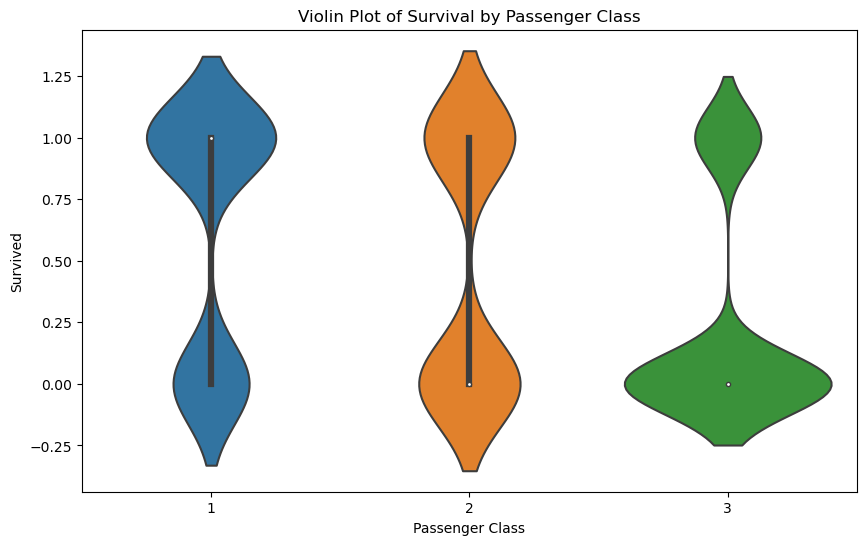

In [39]:
# 1. Survived vs Pclass

plt.figure(figsize=(10, 6))
sns.violinplot(data=train_3, x='Pclass', y='Survived')
plt.title('Violin Plot of Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survived')
plt.show()

###### Assumption and Suggestion
Clearly, passengers in Class 1 had the highest survival rate and were the safest, indicating better conditions or circumstances for survival.

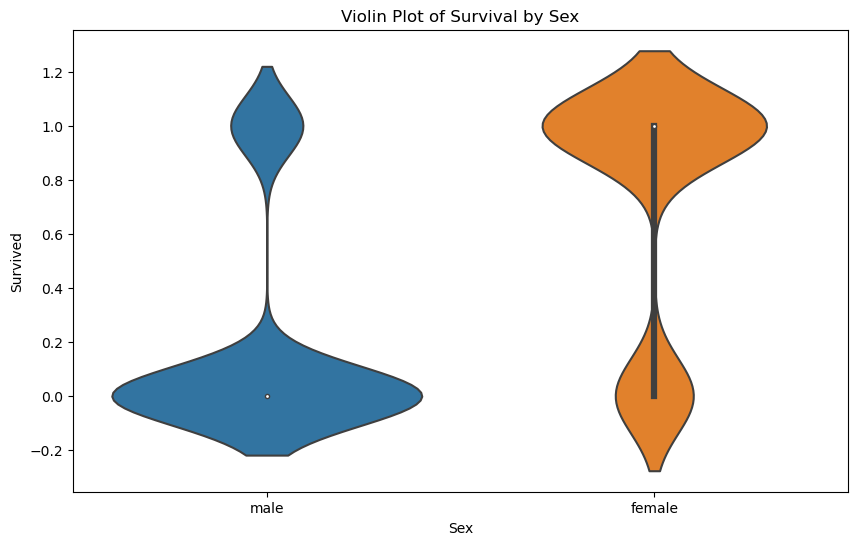

In [40]:
# 2. Survived vs Sex

plt.figure(figsize=(10, 6))
sns.violinplot(data=train_3, x='Sex', y='Survived')
plt.title('Violin Plot of Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.show()

###### Assumption and Suggestion
It is clear that females had a higher survival rate compared to males.


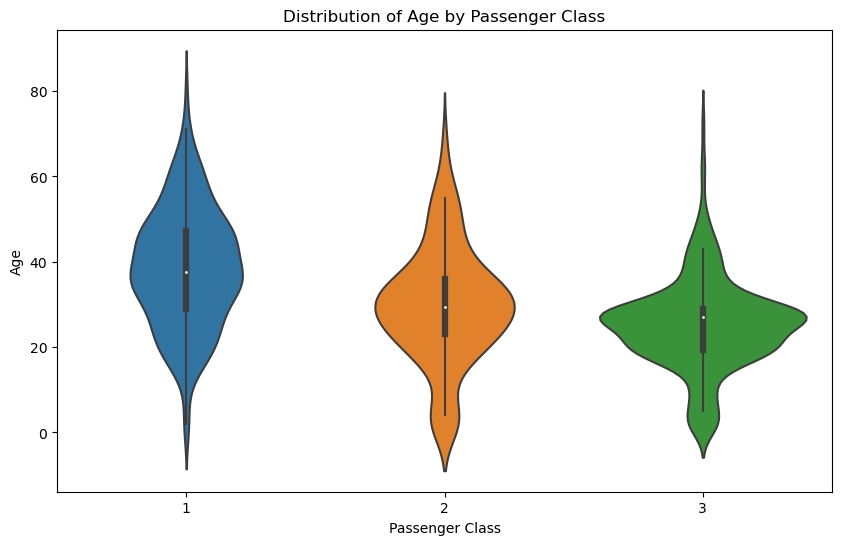

In [41]:
# 3. Age vs Pclass

plt.figure(figsize=(10, 6))
sns.violinplot(data=train_3, x='Pclass', y='Age')
plt.title('Distribution of Age by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

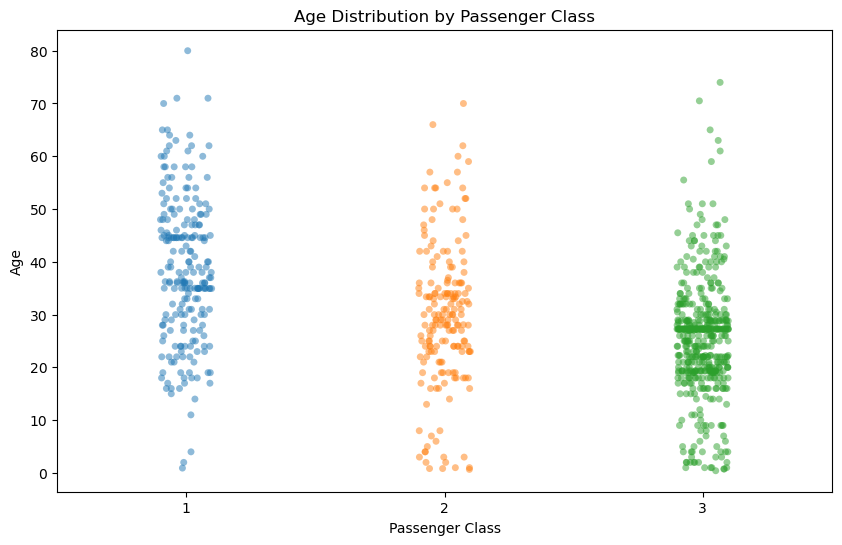

In [42]:
# Strip Plot (with Jitter)
plt.figure(figsize=(10, 6))
sns.stripplot(data=train_3, x='Pclass', y='Age', jitter=True, alpha=0.5)
plt.title('Age Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()


###### Assumption and Suggestion
Most of the passenger is from 20 to 40 years old

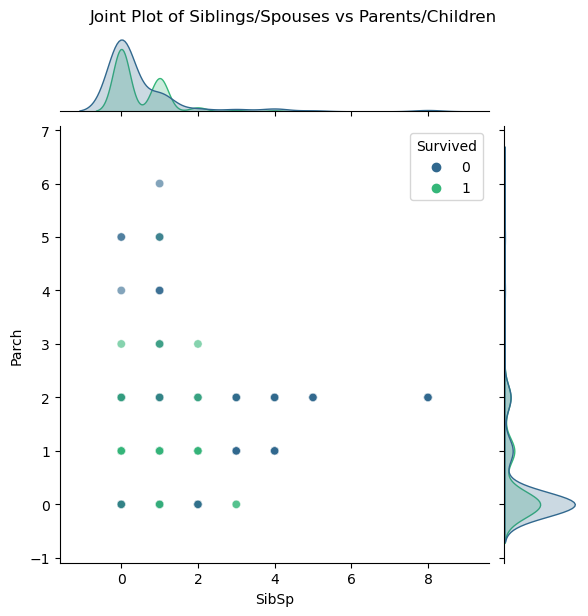

In [43]:
# 4. Parch vs Sibsp

# Create the joint plot and scatter plot
sns.jointplot(data=train_3, x='SibSp', y='Parch', hue='Survived', palette='viridis', alpha=0.6)
plt.suptitle('Joint Plot of Siblings/Spouses vs Parents/Children', y=1.02)
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Number of Parents/Children')
plt.show()

###### Assumption and Suggestion
Passengers with one sibling or spouse had a higher survival rate

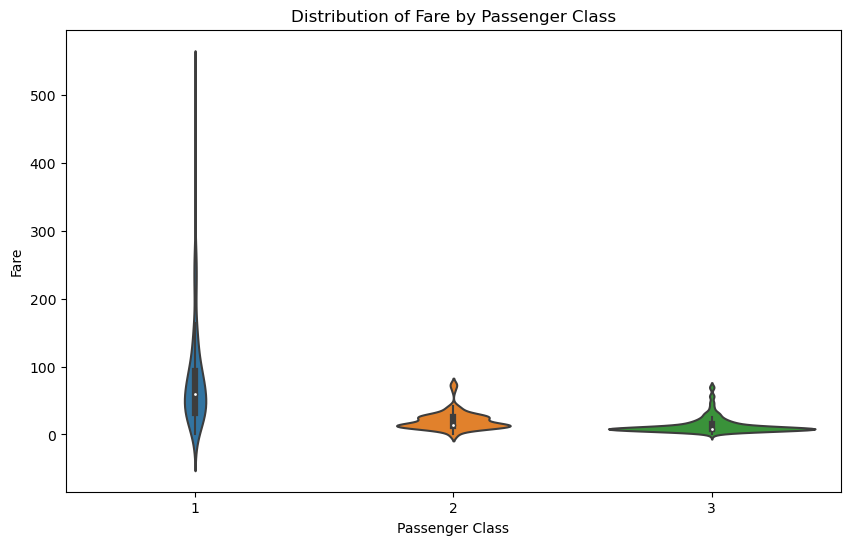

In [44]:
# 5. Fare vs Pclass

plt.figure(figsize=(10, 6))
sns.violinplot(data=train_3, x='Pclass', y='Fare')
plt.title('Distribution of Fare by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()


###### Assumption and Suggestion
Most of the fares are around RM 100

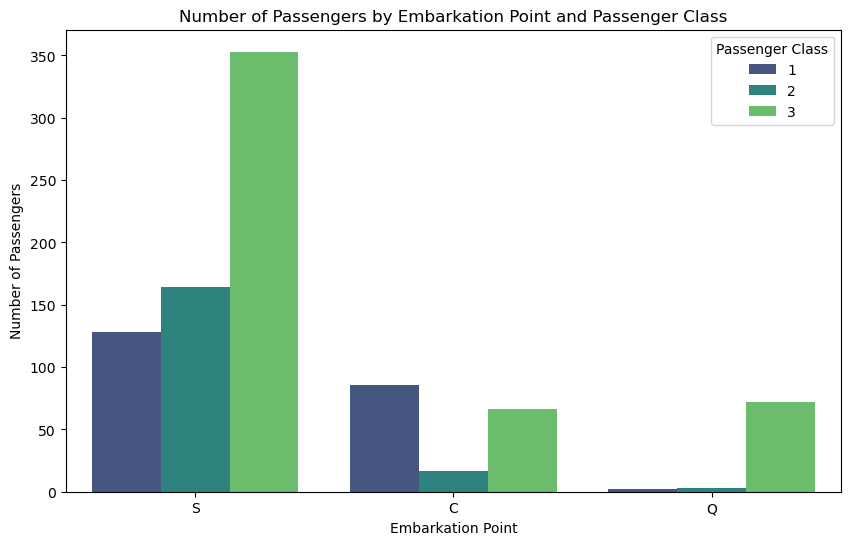

In [45]:
# 6. Embarked vs Pclass
plt.figure(figsize=(10, 6))
sns.countplot(data=train_3, x='Embarked', hue='Pclass', palette='viridis')
plt.title('Number of Passengers by Embarkation Point and Passenger Class')
plt.xlabel('Embarkation Point')
plt.ylabel('Number of Passengers')
plt.legend(title='Passenger Class', loc='upper right')
plt.show()

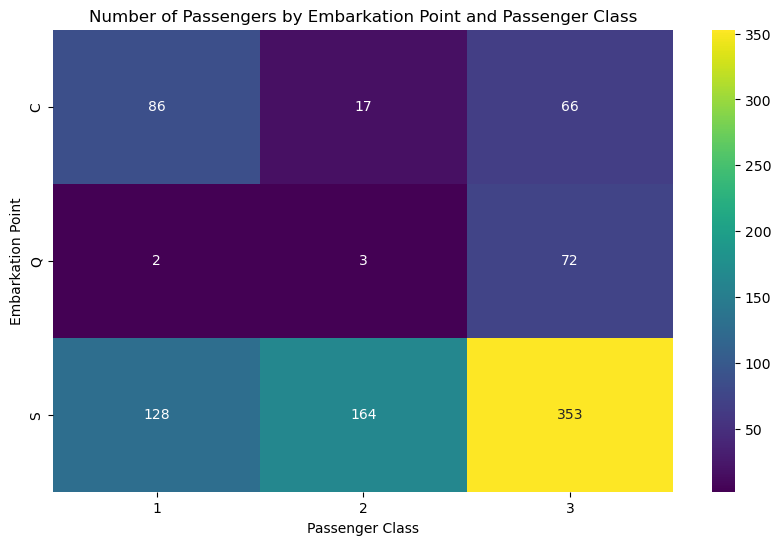

In [46]:
# Create a pivot table
embarked_pclass_counts = train_3.pivot_table(index='Embarked', columns='Pclass', aggfunc='size', fill_value=0)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(embarked_pclass_counts, annot=True, fmt='d', cmap='viridis')
plt.title('Number of Passengers by Embarkation Point and Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Embarkation Point')
plt.show()


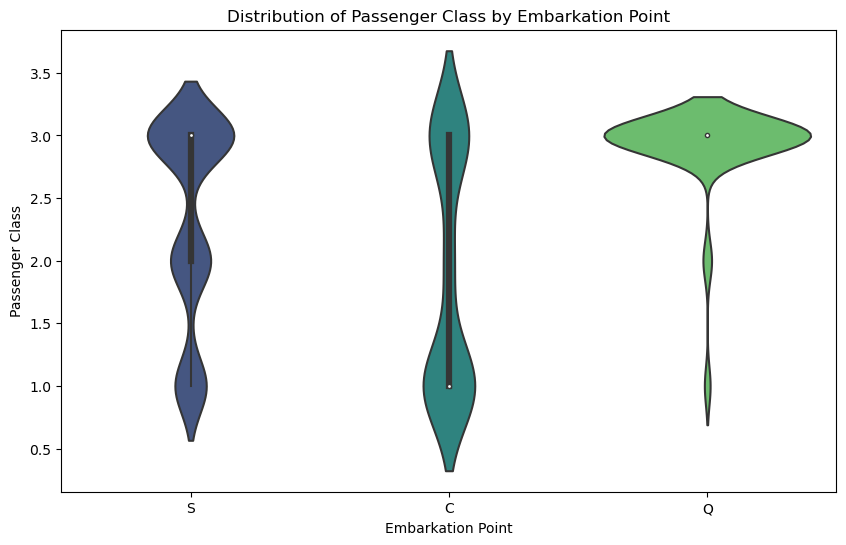

In [47]:
# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=train_3, x='Embarked', y='Pclass', palette='viridis')
plt.title('Distribution of Passenger Class by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Passenger Class')
plt.show()



# Data Binning

###### Assumption and Suggestion
Not big enough data to bin

# Feature Engineering

In [53]:
# Generate dummy variables
df_dummies = pd.get_dummies(train_3, drop_first=False)  # Set drop_first=True to avoid dummy variable trap

# Display the DataFrame with dummy variables
print("DataFrame with Dummy Variables:")
print(df_dummies)

DataFrame with Dummy Variables:
     Survived  Pclass    Age  SibSp  Parch     Fare  Sex_female  Sex_male  \
0           0       3  22.00      1      0   7.2500           0         1   
1           1       1  38.00      1      0  71.2833           1         0   
2           1       3  26.00      0      0   7.9250           1         0   
3           1       1  35.00      1      0  53.1000           1         0   
4           0       3  35.00      0      0   8.0500           0         1   
..        ...     ...    ...    ...    ...      ...         ...       ...   
886         0       2  27.00      0      0  13.0000           0         1   
887         1       1  19.00      0      0  30.0000           1         0   
888         0       3  28.82      1      2  23.4500           1         0   
889         1       1  26.00      0      0  30.0000           0         1   
890         0       3  32.00      0      0   7.7500           0         1   

     Embarked_C  Embarked_Q  Embarked_S  
0

In [55]:
print(df_dummies.columns)

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


# Feature Transformation / Feature Normalization

In [66]:
# separate data into X and Y
X = df_dummies.drop(['Survived'], axis=1)
y = df_dummies['Survived']

In [61]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
# XT = Transformation X 
XT = sc_X.fit_transform(X)
X = pd.DataFrame(XT, columns = X.columns)

# Train Test

In [70]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [71]:
# get shape of train and test data
print("train size X : ",X_train.shape)
print("train size Y : ",y_train.shape)
print("test size X : ",X_test.shape)
print("test size Y : ",y_test.shape)

train size X :  (623, 10)
train size Y :  (623,)
test size X :  (268, 10)
test size Y :  (268,)


D:\Downloads\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Downloads\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

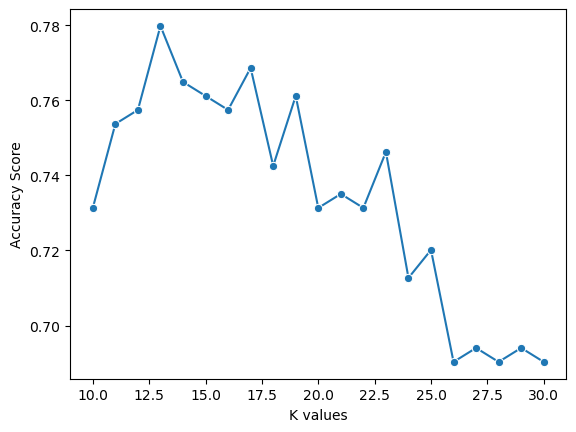

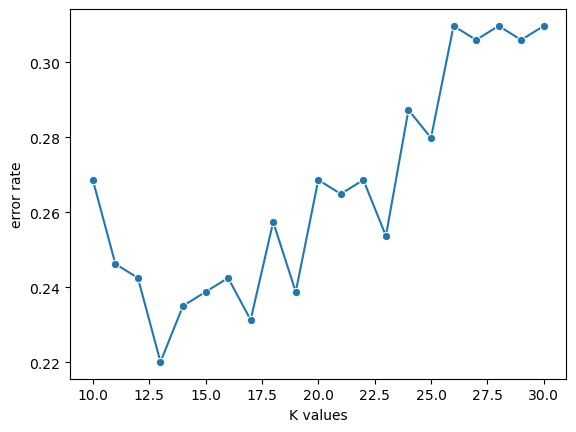

In [74]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# kNN modelling to find best K value
k_values = [i for i in range (10,31)]
scores = []
error_rate = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(knn.score(X_test, y_test))
    error_rate.append(np.mean(y_pred!=y_test))
    
sns.lineplot(x=k_values, y=scores, marker='o')
plt.xlabel('K values')
plt.ylabel('Accuracy Score')
plt.show()

sns.lineplot(x=k_values, y=error_rate, marker='o')
plt.xlabel('K values')
plt.ylabel('error rate')
plt.show()

In [83]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

# kNN modelling with best K value
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('\nK = ',best_k)
print('\nClassification Report: \n')
print(classification_report(y_test, y_pred))

print('\nkNN confusion matrix: \n')
cm = confusion_matrix(y_test,y_pred)
print(cm)


# Predict probabilities for the test data
y_prob = knn.predict_proba(X_test)

# Calculate cross-entropy loss
#EPSILON = 1e-7
#test_loss = -np.mean(y_test * np.log(y_prob[:, 1] + EPSILON) + (1 - y_test) * np.log(1 - y_prob[:, 1] + EPSILON))

#print('\n')
#print("Test loss: ", test_loss)


K =  13

Classification Report: 

              precision    recall  f1-score   support

           0       0.78      0.88      0.82       157
           1       0.79      0.64      0.71       111

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268


kNN confusion matrix: 

[[138  19]
 [ 40  71]]


D:\Downloads\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [82]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

class_report = classification_report(y_test, y_pred)
print("\nClassification Report: \n")
print(class_report)


conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix: \n")
print(conf_matrix)

Accuracy: 0.82

Classification Report: 

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       157
           1       0.81      0.73      0.77       111

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268


Confusion Matrix: 

[[138  19]
 [ 30  81]]


D:\Downloads\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
